# GESO example: HalfMBB Beam

## Commented Program

What follows is a program spliced with comments.

In [1]:
using TopOpt

### Define the problem

In [2]:
E = 1.0 # Young’s modulus
v = 0.3 # Poisson’s ratio
f = 1.0; # downward force

nels = (160, 40)
problem = HalfMBB(Val{:Linear}, nels, (1.0, 1.0), E, v, f)

### Define the FEA Solver and penalty functions

In [3]:
solver = FEASolver(Direct, problem; xmin=0.01, penalty=TopOpt.PowerPenalty(3.0))

### Define the compliance objective function and volume fraction constraint

In [4]:
comp = Compliance(solver)
volfrac = Volume(solver)
sensfilter = SensFilter(solver; rmin=4.0)
geso = GESO(comp, volfrac, 0.5, sensfilter)

### Run optimization

In [5]:
x0 = ones(length(solver.vars))
result = geso(x0)

TopOpt.Algorithms.GESOResult{Float64, Vector{Float64}}([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 389.7134010494241, 0.0009864026933976882, true, 94)

### (Optional) Visualize the result using Makie.jl
Need to run `using Pkg; Pkg.add("Makie")` first and either `Pkg.add("CairoMakie")` or `Pkg.add("GLMakie")`

In [6]:
using Makie
using CairoMakie

alternatively, `using GLMakie`

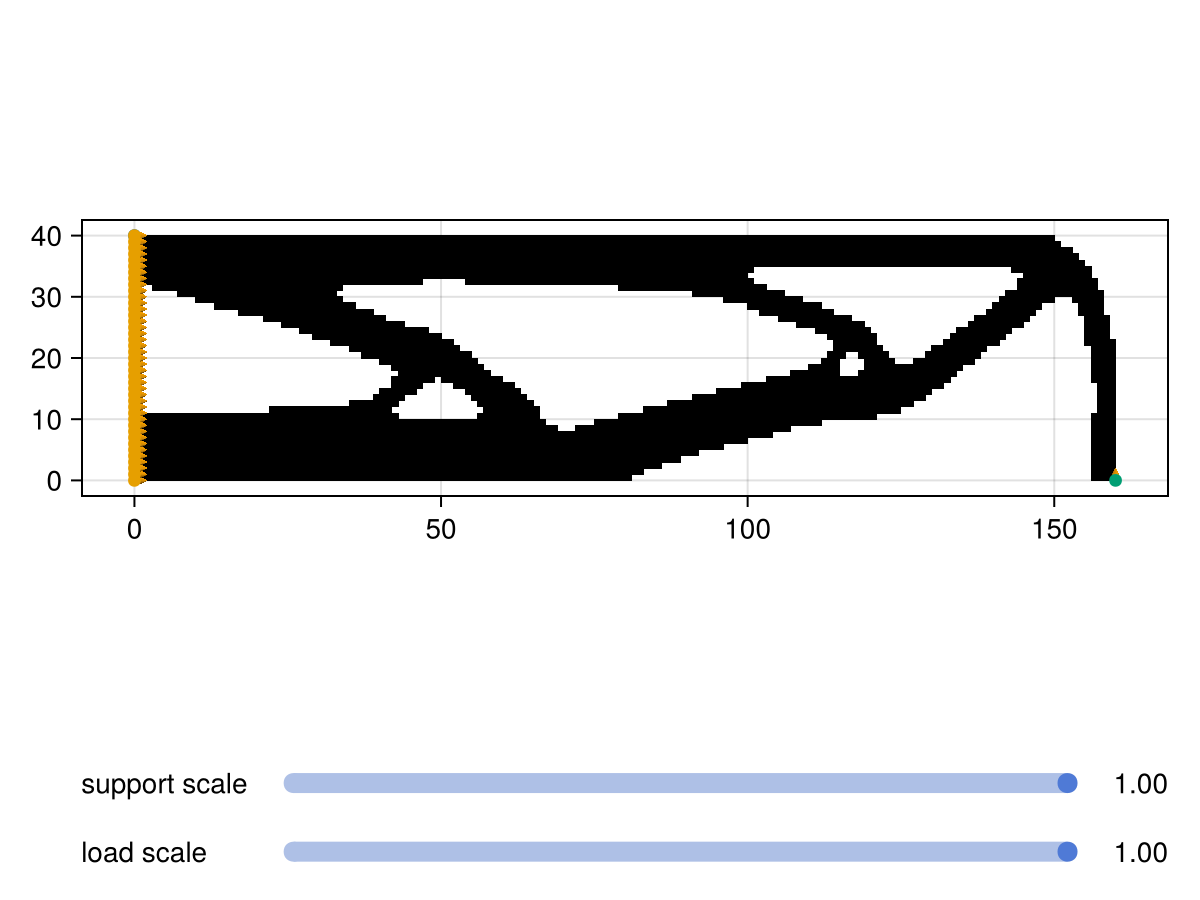

CairoMakie.Screen{IMAGE}


In [7]:
fig = visualize(problem; topology=result.topology)
Makie.display(fig)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*